In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

from utils import *

In [38]:
#selected subset of dates. 
val_dates = ['180327','180329']
test_dates = ['180330','180331']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/'
model_saving_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/LR_models'

CH = 23
train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=256, CH = CH)

In [39]:
len(train_loader), len(val_loader), len(test_loader)

(50, 16, 16)

In [40]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([256, 1, 100, 15])
torch.Size([256, 1])
256
256
256


date:180324, rec:008, time:3685.0


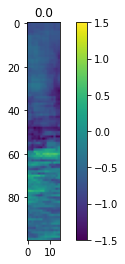

date:180323, rec:002, time:732.0


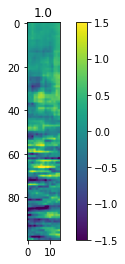

date:180401, rec:001, time:1617.0


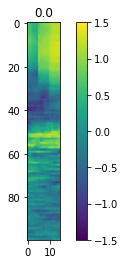

date:180324, rec:001, time:102.0


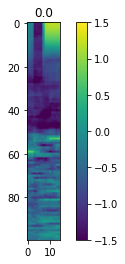

date:180322, rec:004, time:3835.0


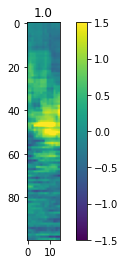

date:180324, rec:005, time:2432.0


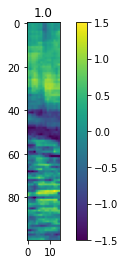

date:180323, rec:004, time:3120.0


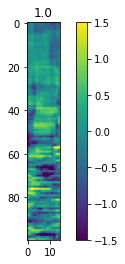

date:180325, rec:007, time:4790.0


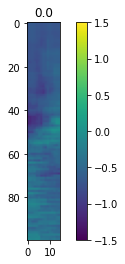

date:180325, rec:005, time:6455.0


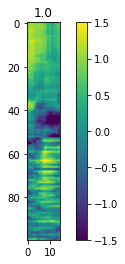

date:180325, rec:005, time:4740.0


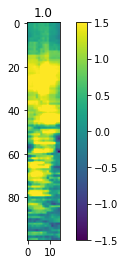

date:180325, rec:006, time:418.0


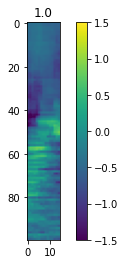

date:180325, rec:009, time:3963.0


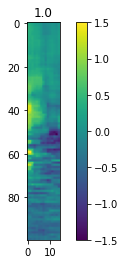

date:180324, rec:009, time:1044.0


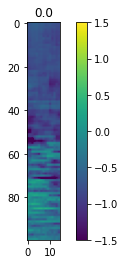

date:180325, rec:005, time:7026.0


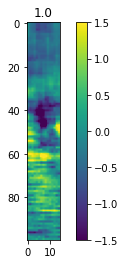

date:180324, rec:001, time:3287.0


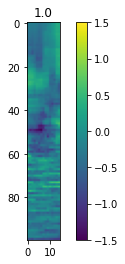

date:180323, rec:007, time:6428.0


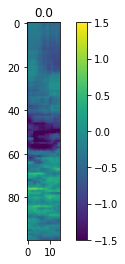

date:180325, rec:007, time:4025.0


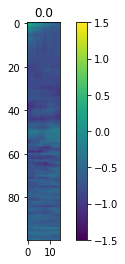

date:180325, rec:001, time:1917.0


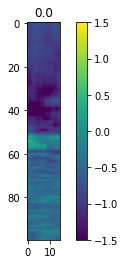

date:180401, rec:002, time:2488.0


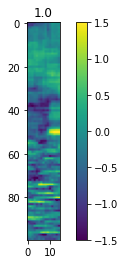

date:180323, rec:002, time:6438.0


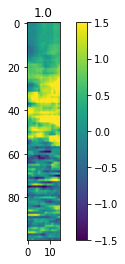

date:180323, rec:002, time:4583.0


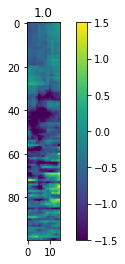

date:180324, rec:001, time:1233.0


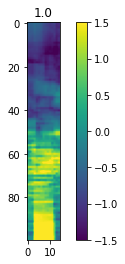

date:180325, rec:009, time:4616.0


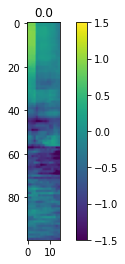

date:180325, rec:007, time:2638.0


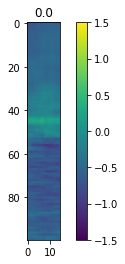

date:180325, rec:002, time:2244.0


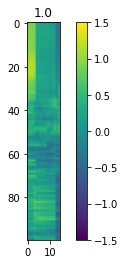

date:180325, rec:007, time:4865.0


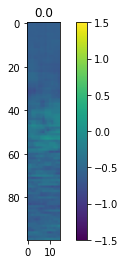

date:180325, rec:001, time:3462.0


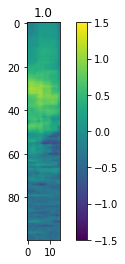

date:180324, rec:008, time:5941.0


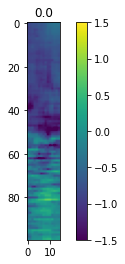

date:180323, rec:007, time:5663.0


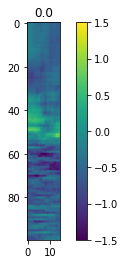

date:180325, rec:007, time:6785.0


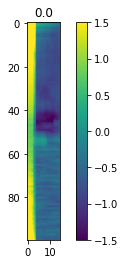

date:180324, rec:008, time:4481.0


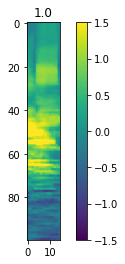

date:180324, rec:006, time:3461.0


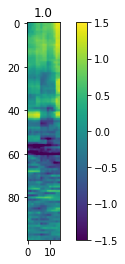

date:180324, rec:008, time:2380.0


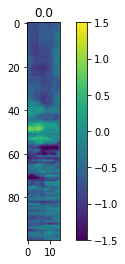

date:180324, rec:008, time:4087.0


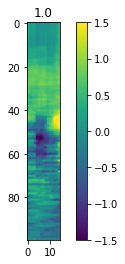

date:180325, rec:004, time:389.0


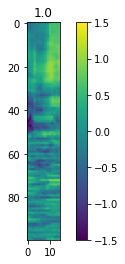

date:180325, rec:007, time:2818.0


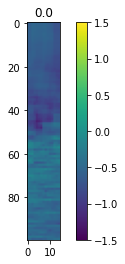

date:180324, rec:008, time:1288.0


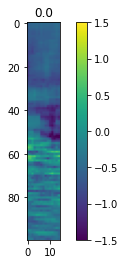

date:180322, rec:005, time:2182.0


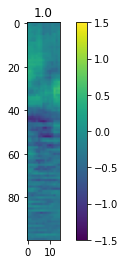

date:180324, rec:001, time:6604.0


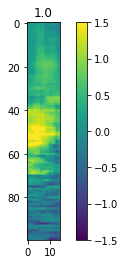

date:180325, rec:007, time:6485.0


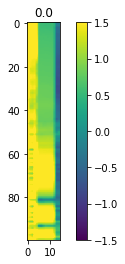

date:180401, rec:001, time:897.0


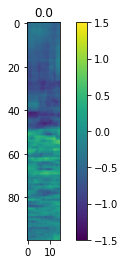

date:180325, rec:006, time:1525.0


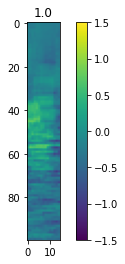

date:180323, rec:002, time:2423.0


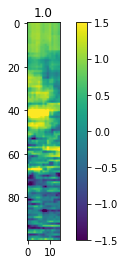

date:180325, rec:006, time:4752.0


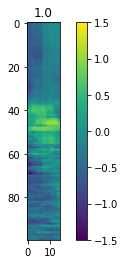

date:180322, rec:004, time:4176.0


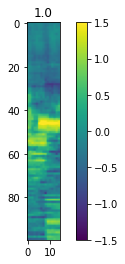

date:180325, rec:001, time:6908.0


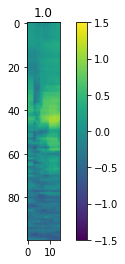

date:180325, rec:009, time:4871.0


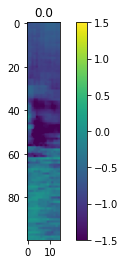

date:180401, rec:001, time:1332.0


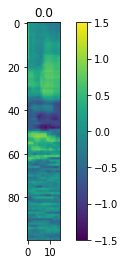

date:180325, rec:009, time:4871.0


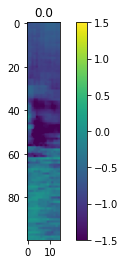

date:180322, rec:007, time:4412.0


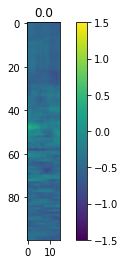

date:180322, rec:003, time:5375.0


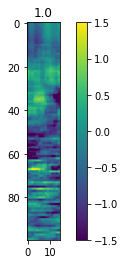

date:180325, rec:005, time:5139.0


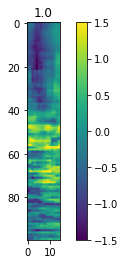

date:180324, rec:006, time:404.0


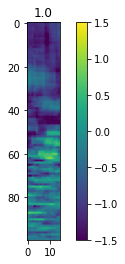

date:180325, rec:009, time:1092.0


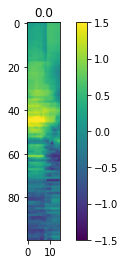

date:180322, rec:007, time:3506.0


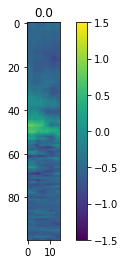

date:180325, rec:009, time:6512.0


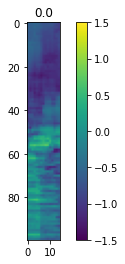

date:180324, rec:004, time:4596.0


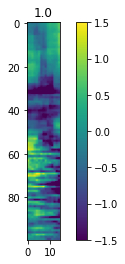

date:180401, rec:001, time:1002.0


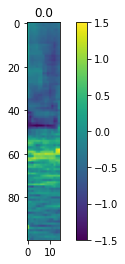

date:180323, rec:003, time:6033.0


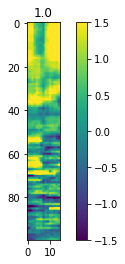

date:180324, rec:008, time:2680.0


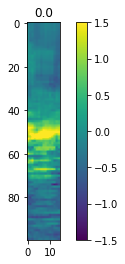

date:180401, rec:002, time:6973.0


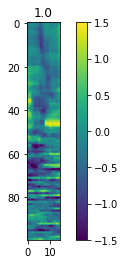

date:180325, rec:007, time:3964.0


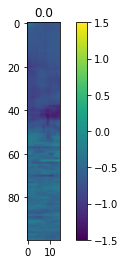

date:180325, rec:007, time:3979.0


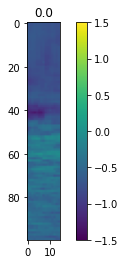

date:180325, rec:003, time:2252.0


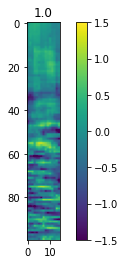

date:180324, rec:001, time:5846.0


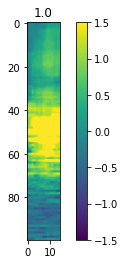

date:180325, rec:005, time:2483.0


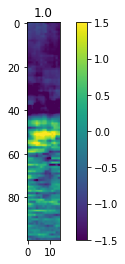

date:180323, rec:007, time:4338.0


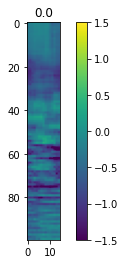

date:180325, rec:003, time:5909.0


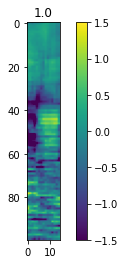

date:180323, rec:001, time:42.0


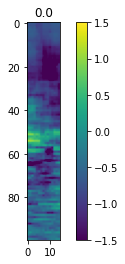

date:180324, rec:008, time:2455.0


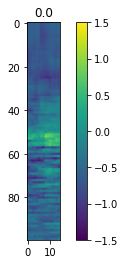

date:180324, rec:009, time:462.0


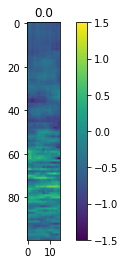

date:180322, rec:007, time:5102.0


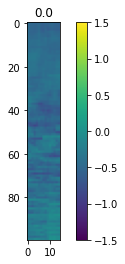

date:180325, rec:006, time:2424.0


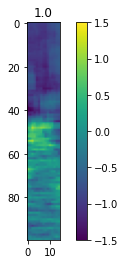

date:180325, rec:006, time:2739.0


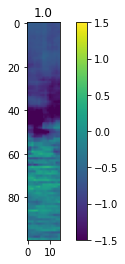

date:180401, rec:001, time:687.0


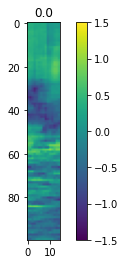

date:180325, rec:004, time:4901.0


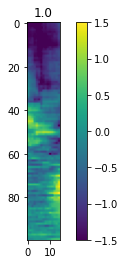

date:180324, rec:005, time:2177.0


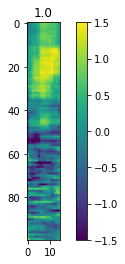

date:180325, rec:004, time:930.0


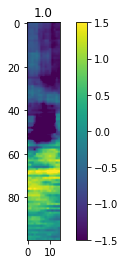

date:180322, rec:007, time:1379.0


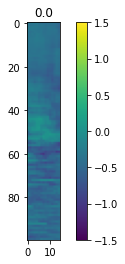

date:180324, rec:001, time:567.0


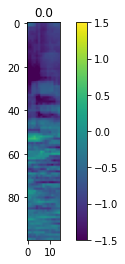

date:180322, rec:001, time:102.0


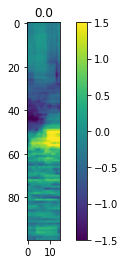

date:180325, rec:009, time:102.0


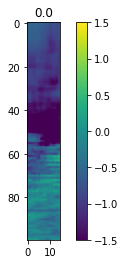

date:180323, rec:001, time:6535.0


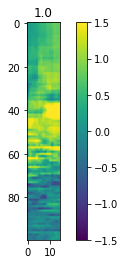

date:180325, rec:004, time:72.0


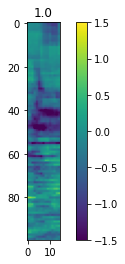

date:180401, rec:001, time:1347.0


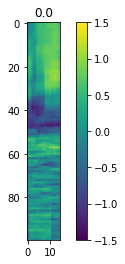

date:180325, rec:009, time:4871.0


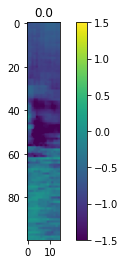

date:180322, rec:004, time:448.0


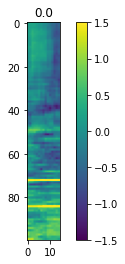

date:180325, rec:007, time:2758.0


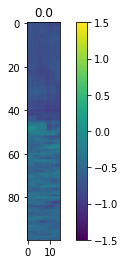

date:180324, rec:001, time:6041.0


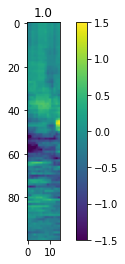

date:180324, rec:008, time:2023.0


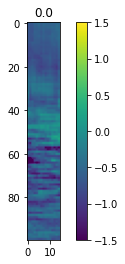

date:180325, rec:005, time:6906.0


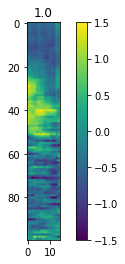

date:180324, rec:006, time:1838.0


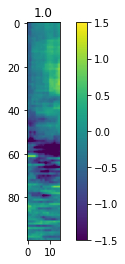

date:180322, rec:003, time:1385.0


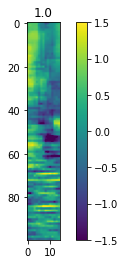

date:180323, rec:002, time:4673.0


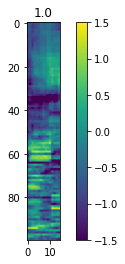

date:180325, rec:001, time:3657.0


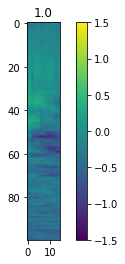

date:180322, rec:005, time:2454.0


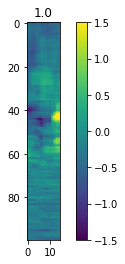

date:180324, rec:008, time:3745.0


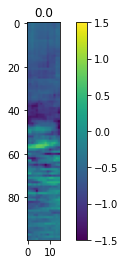

date:180325, rec:001, time:1362.0


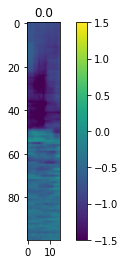

date:180322, rec:007, time:2300.0


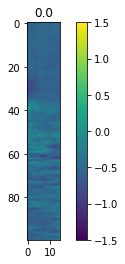

date:180322, rec:004, time:6015.0


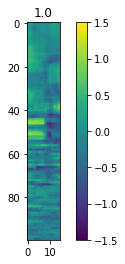

date:180323, rec:002, time:4658.0


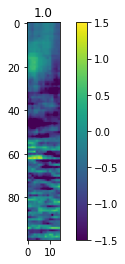

date:180322, rec:005, time:1165.0


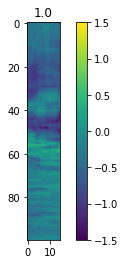

date:180323, rec:003, time:4684.0


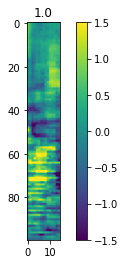

date:180324, rec:001, time:3422.0


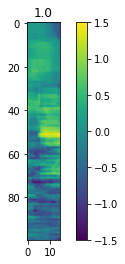

date:180325, rec:009, time:2322.0


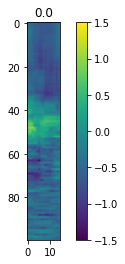

date:180323, rec:005, time:4175.0


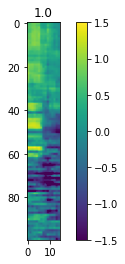

date:180324, rec:004, time:2994.0


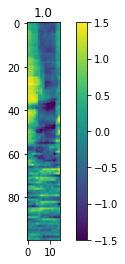

date:180322, rec:007, time:4412.0


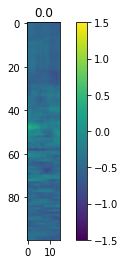

date:180401, rec:001, time:3380.0


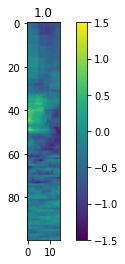

date:180322, rec:004, time:5488.0


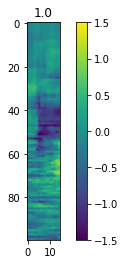

date:180324, rec:001, time:880.0


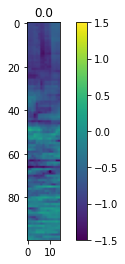

date:180323, rec:007, time:5663.0


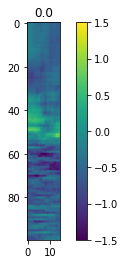

date:180401, rec:001, time:6950.0


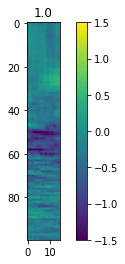

date:180325, rec:007, time:2863.0


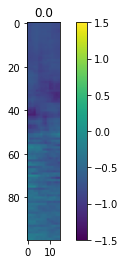

date:180324, rec:009, time:2164.0


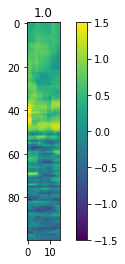

date:180325, rec:009, time:5051.0


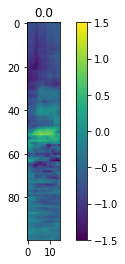

date:180325, rec:001, time:1902.0


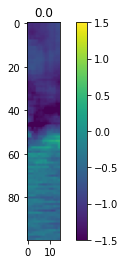

date:180401, rec:003, time:962.0


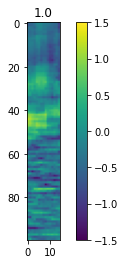

date:180324, rec:009, time:837.0


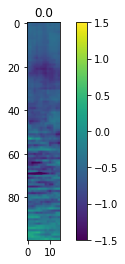

date:180325, rec:002, time:2349.0


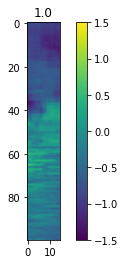

date:180401, rec:001, time:1347.0


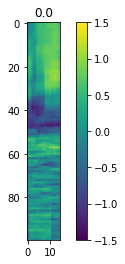

date:180323, rec:004, time:3705.0


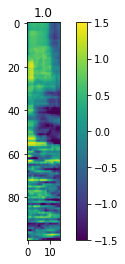

date:180325, rec:005, time:5524.0


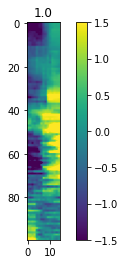

date:180324, rec:005, time:522.0


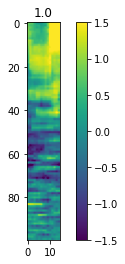

date:180324, rec:008, time:1798.0


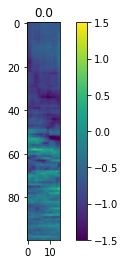

date:180322, rec:003, time:5828.0


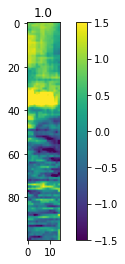

date:180325, rec:005, time:4263.0


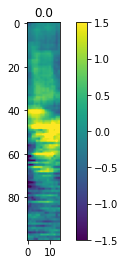

date:180325, rec:002, time:5405.0


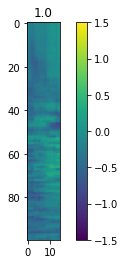

In [41]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}'.format(date[i], rec[i], time[i]))
        data_sub = data[i][0]
        plt.imshow(data_sub)
        plt.clim(-1.5, 1.5)
        plt.colorbar()
        plt.title(label[i][0].numpy())
        plt.show()
    break

### Logistic regression with no regularization

In [18]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'
timewindow = 15



Train loss for epoch 0: 0.5364744067192078
Val loss for epoch 0: 0.5188269019126892
Train loss for epoch 1: 0.4996130168437958
Val loss for epoch 1: 0.5114378929138184
1
Train loss for epoch 2: 0.4865894317626953
Val loss for epoch 2: 0.4939744472503662
2
Train loss for epoch 3: 0.48506924510002136
Val loss for epoch 3: 0.5042917728424072
Train loss for epoch 4: 0.4731420874595642
Val loss for epoch 4: 0.49809229373931885
Train loss for epoch 5: 0.466434508562088
Val loss for epoch 5: 0.48873239755630493
5
Train loss for epoch 6: 0.4611108601093292
Val loss for epoch 6: 0.5064411163330078
Train loss for epoch 7: 0.4589370787143707
Val loss for epoch 7: 0.49615272879600525
Train loss for epoch 8: 0.4562077820301056
Val loss for epoch 8: 0.48565468192100525
8
Train loss for epoch 9: 0.4496828317642212
Val loss for epoch 9: 0.4844835698604584
9
Train loss for epoch 10: 0.449242502450943
Val loss for epoch 10: 0.47331225872039795
10
Train loss for epoch 11: 0.4402156472206116
Val loss for 

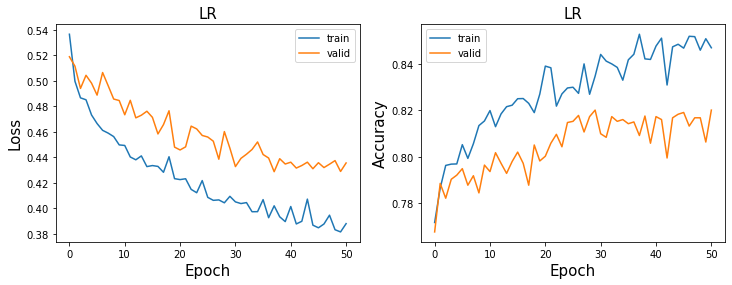

Train loss for epoch 0: 0.5419975519180298
Val loss for epoch 0: 0.5119302868843079
Train loss for epoch 1: 0.498665988445282
Val loss for epoch 1: 0.5142956376075745
Train loss for epoch 2: 0.4908265769481659
Val loss for epoch 2: 0.4919228255748749
2
Train loss for epoch 3: 0.4840104579925537
Val loss for epoch 3: 0.49276483058929443
Train loss for epoch 4: 0.475016325712204
Val loss for epoch 4: 0.502204179763794
Train loss for epoch 5: 0.471017062664032
Val loss for epoch 5: 0.48666900396347046
5
Train loss for epoch 6: 0.4634009599685669
Val loss for epoch 6: 0.4930382966995239
Train loss for epoch 7: 0.4570362865924835
Val loss for epoch 7: 0.4806888699531555
7
Train loss for epoch 8: 0.45725134015083313
Val loss for epoch 8: 0.48128071427345276
Train loss for epoch 9: 0.46036311984062195
Val loss for epoch 9: 0.4880364239215851
Train loss for epoch 10: 0.45323142409324646
Val loss for epoch 10: 0.4759089946746826
10
Train loss for epoch 11: 0.44490137696266174
Val loss for epoch

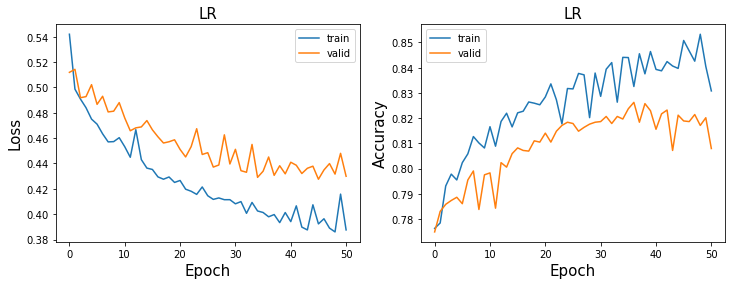

Train loss for epoch 0: 0.528800904750824
Val loss for epoch 0: 0.499582976102829
Train loss for epoch 1: 0.4955052435398102
Val loss for epoch 1: 0.5083869695663452
Train loss for epoch 2: 0.4929092228412628
Val loss for epoch 2: 0.5089460015296936
Train loss for epoch 3: 0.483672559261322
Val loss for epoch 3: 0.5002098679542542
Train loss for epoch 4: 0.4761410653591156
Val loss for epoch 4: 0.4982110261917114
4
Train loss for epoch 5: 0.46518540382385254
Val loss for epoch 5: 0.472913533449173
5
Train loss for epoch 6: 0.48095735907554626
Val loss for epoch 6: 0.4787912368774414
Train loss for epoch 7: 0.4575045704841614
Val loss for epoch 7: 0.469680517911911
7
Train loss for epoch 8: 0.45378050208091736
Val loss for epoch 8: 0.48138192296028137
Train loss for epoch 9: 0.45692816376686096
Val loss for epoch 9: 0.47875845432281494
Train loss for epoch 10: 0.44841235876083374
Val loss for epoch 10: 0.4652034640312195
10
Train loss for epoch 11: 0.44422295689582825
Val loss for epoch

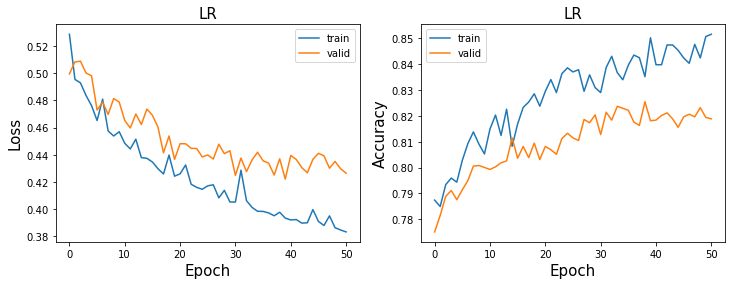

In [13]:
for alpha in alphas:
    model = GLM(input_dim=100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [14]:
alpha

100

In [24]:
model_LR = os.listdir(model_saving_path)
results = []
for alpha in alphas:
    epoch_results = []
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'REDUCEsum' in s:
            continue
        else:
            if '_CH23_' in s and reg_alpha in s:
                model_name = model_LR[i].split('_')
                epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
                res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
                if len(res) > 1:
                    epoch_result = res[0]*10+res[1]
                else:
                    epoch_result = res[0]
                epoch_results.append(epoch_result)
            
    results.append([alpha, max(epoch_results)])
    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1         37
50        45
100       39


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/LR_models/LR_CH23_LOSSbce_REGnone1_EPOCH37.pt


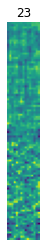

validation loss:0.42866817116737366 accuracy:0.8092088527092343
0.7914017
date:180327, rec:006, time:117.0, label:1.0
Original data 62 CH


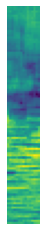

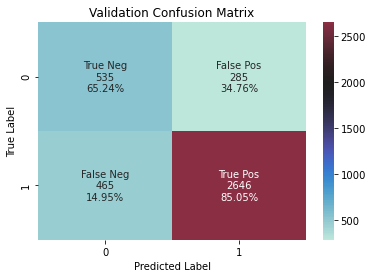

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/LR_models/LR_CH23_LOSSbce_REGnone50_EPOCH45.pt


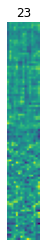

validation loss:0.42756643891334534 accuracy:0.8188756041719665
0.7914017
date:180327, rec:006, time:117.0, label:1.0
Original data 62 CH


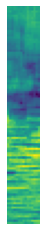

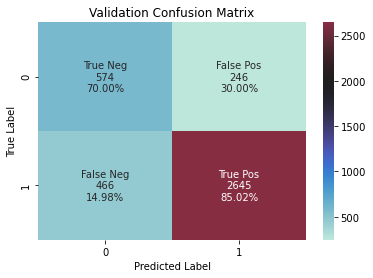

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/LR_models/LR_CH23_LOSSbce_REGnone100_EPOCH39.pt


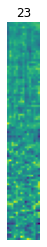

validation loss:0.42197224497795105 accuracy:0.8181124395828033
0.7914017
date:180327, rec:006, time:117.0, label:1.0
Original data 62 CH


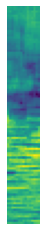

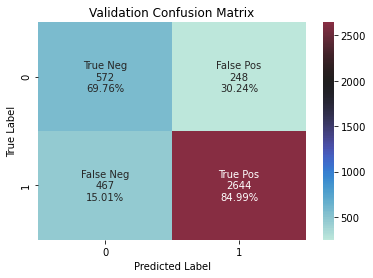

In [25]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*timewindow).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, timewindow)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Confusion matrix
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()

### Logistic regression with L2 regularization

In [26]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100] 
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'
timewindow = 15



Train loss for epoch 0: 0.5352194905281067
Val loss for epoch 0: 0.5142286419868469
Train loss for epoch 1: 0.4912031590938568
Val loss for epoch 1: 0.503485381603241
1
Train loss for epoch 2: 0.4791366755962372
Val loss for epoch 2: 0.49765244126319885
2
Train loss for epoch 3: 0.47295987606048584
Val loss for epoch 3: 0.483638733625412
3
Train loss for epoch 4: 0.5095925331115723
Val loss for epoch 4: 0.4970652163028717
Train loss for epoch 5: 0.4700598418712616
Val loss for epoch 5: 0.49875637888908386
Train loss for epoch 6: 0.4568506181240082
Val loss for epoch 6: 0.4885469675064087
Train loss for epoch 7: 0.45323166251182556
Val loss for epoch 7: 0.4990823566913605
Train loss for epoch 8: 0.45225846767425537
Val loss for epoch 8: 0.4960844814777374
Train loss for epoch 9: 0.4507199227809906
Val loss for epoch 9: 0.4687920808792114
9
Train loss for epoch 10: 0.44943317770957947
Val loss for epoch 10: 0.47005048394203186
Train loss for epoch 11: 0.43997722864151
Val loss for epoch 

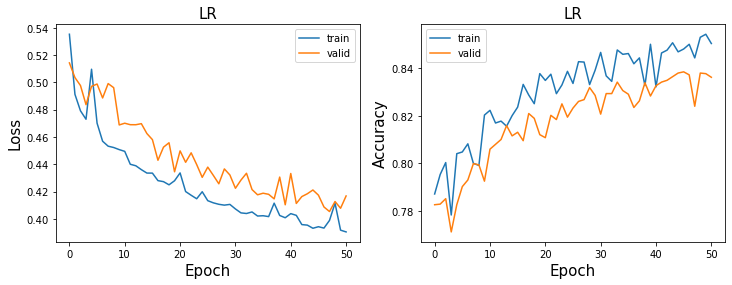

Train loss for epoch 0: 0.6229538321495056
Val loss for epoch 0: 0.6009005308151245
Train loss for epoch 1: 0.5630216002464294
Val loss for epoch 1: 0.5599142909049988
1
Train loss for epoch 2: 0.5637177228927612
Val loss for epoch 2: 0.5460143685340881
2
Train loss for epoch 3: 0.5750977993011475
Val loss for epoch 3: 0.5469644665718079
Train loss for epoch 4: 0.5733854174613953
Val loss for epoch 4: 0.5406996011734009
4
Train loss for epoch 5: 0.5682221055030823
Val loss for epoch 5: 0.5279842019081116
5
Train loss for epoch 6: 0.5948465466499329
Val loss for epoch 6: 0.5313621163368225
Train loss for epoch 7: 0.5634137988090515
Val loss for epoch 7: 0.5197293758392334
7
Train loss for epoch 8: 0.565970778465271
Val loss for epoch 8: 0.5173293948173523
8
Train loss for epoch 9: 0.5737534165382385
Val loss for epoch 9: 0.5165070295333862
9
Train loss for epoch 10: 0.5690207481384277
Val loss for epoch 10: 0.5121500492095947
10
Train loss for epoch 11: 0.5646727681159973
Val loss for e

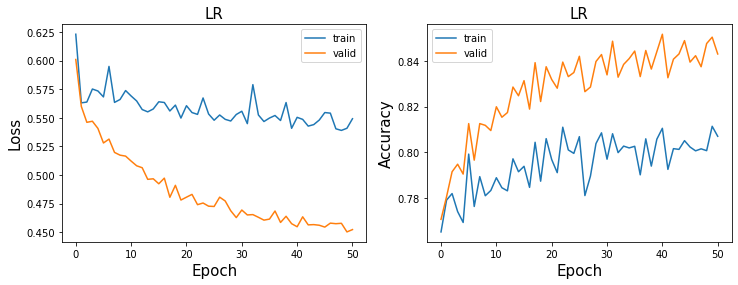

Train loss for epoch 0: 0.7170072197914124
Val loss for epoch 0: 0.620474636554718
Train loss for epoch 1: 0.5967022180557251
Val loss for epoch 1: 0.5863683819770813
1
Train loss for epoch 2: 0.6268836259841919
Val loss for epoch 2: 0.5850763320922852
2
Train loss for epoch 3: 0.6531163454055786
Val loss for epoch 3: 0.5791890621185303
3
Train loss for epoch 4: 0.6211244463920593
Val loss for epoch 4: 0.575486958026886
4
Train loss for epoch 5: 0.6279224753379822
Val loss for epoch 5: 0.5665823221206665
5
Train loss for epoch 6: 0.6188516020774841
Val loss for epoch 6: 0.5584080815315247
6
Train loss for epoch 7: 0.6165988445281982
Val loss for epoch 7: 0.553978443145752
7
Train loss for epoch 8: 0.6173937320709229
Val loss for epoch 8: 0.5460368394851685
8
Train loss for epoch 9: 0.6254546046257019
Val loss for epoch 9: 0.545820415019989
9
Train loss for epoch 10: 0.6133910417556763
Val loss for epoch 10: 0.5426118969917297
10
Train loss for epoch 11: 0.6162337064743042
Val loss for 

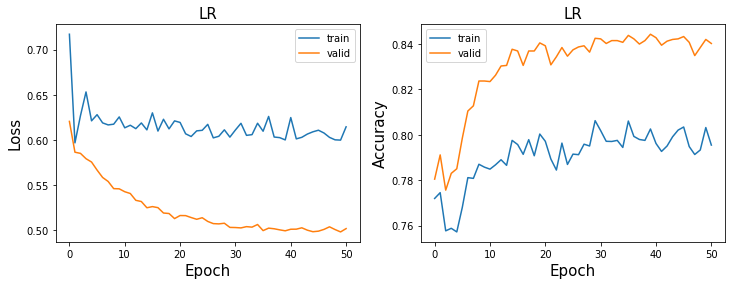

In [27]:
for alpha in alphas:
    model = GLM(input_dim=100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break           
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [28]:
model_LR = os.listdir(model_saving_path)
results = []
for alpha in alphas:
    epoch_results = []
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'REDUCEsum' in s:
            continue
        else:
            if '_CH23_' in s and reg_alpha in s:
                model_name = model_LR[i].split('_')
                epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
                res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
                if len(res) > 1:
                    epoch_result = res[0]*10+res[1]
                else:
                    epoch_result = res[0]
                epoch_results.append(epoch_result)
            
    results.append([alpha, max(epoch_results)])
    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1         47
50        49
100       49


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/LR_models/LR_CH23_LOSSbce_REGl21_EPOCH47.pt


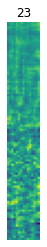

validation loss:0.40536537766456604 accuracy:0.8239633680997202
0.7914017
date:180327, rec:006, time:117.0, label:1.0
Original data 62 CH


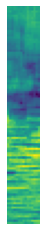

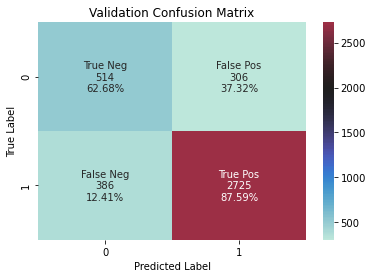

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/LR_models/LR_CH23_LOSSbce_REGl250_EPOCH49.pt


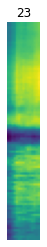

validation loss:0.450285404920578 accuracy:0.8504197405240397
0.7914017
date:180327, rec:006, time:117.0, label:1.0
Original data 62 CH


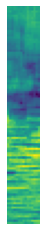

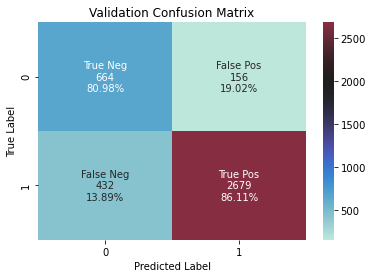

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/LR_models/LR_CH23_LOSSbce_REGl2100_EPOCH49.pt


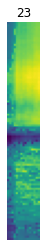

validation loss:0.49809807538986206 accuracy:0.842024930043246
0.7914017
date:180327, rec:006, time:117.0, label:1.0
Original data 62 CH


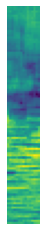

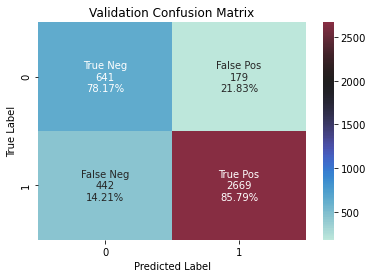

In [31]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*timewindow).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, timewindow)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device, timewindow = timewindow)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Confusion matrix
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()

### Logistic Regression with finite difference regularization

In [32]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'
timewindow = 15

model = GLM(input_dim=100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

Train loss for epoch 0: 0.5362414121627808
Val loss for epoch 0: 0.5147913098335266
Train loss for epoch 1: 0.49583059549331665
Val loss for epoch 1: 0.5170527100563049
Train loss for epoch 2: 0.4809815585613251
Val loss for epoch 2: 0.5120337009429932
2
Train loss for epoch 3: 0.4749126136302948
Val loss for epoch 3: 0.5095742344856262
3
Train loss for epoch 4: 0.4674697816371918
Val loss for epoch 4: 0.5137224197387695
Train loss for epoch 5: 0.46391379833221436
Val loss for epoch 5: 0.5012097954750061
5
Train loss for epoch 6: 0.4598391354084015
Val loss for epoch 6: 0.4858130216598511
6
Train loss for epoch 7: 0.45785003900527954
Val loss for epoch 7: 0.4779106378555298
7
Train loss for epoch 8: 0.46708640456199646
Val loss for epoch 8: 0.47939905524253845
Train loss for epoch 9: 0.46787723898887634
Val loss for epoch 9: 0.5021244883537292
Train loss for epoch 10: 0.4528767764568329
Val loss for epoch 10: 0.47177577018737793
10
Train loss for epoch 11: 0.44436654448509216
Val loss 

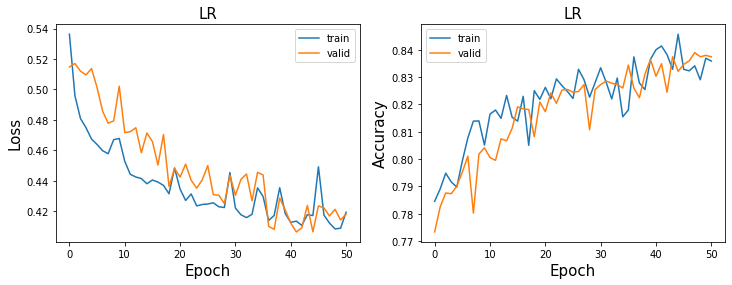

Train loss for epoch 0: 0.6920173764228821
Val loss for epoch 0: 0.531436562538147
Train loss for epoch 1: 0.5590871572494507
Val loss for epoch 1: 0.5280903577804565
1
Train loss for epoch 2: 0.564795732498169
Val loss for epoch 2: 0.5369120836257935
Train loss for epoch 3: 0.5588250160217285
Val loss for epoch 3: 0.5310367941856384
Train loss for epoch 4: 0.558149516582489
Val loss for epoch 4: 0.5306107401847839
Train loss for epoch 5: 0.5545477867126465
Val loss for epoch 5: 0.5174275636672974
5
Train loss for epoch 6: 0.5571014881134033
Val loss for epoch 6: 0.5203641057014465
Train loss for epoch 7: 0.555302619934082
Val loss for epoch 7: 0.5166983604431152
7
Train loss for epoch 8: 0.5530090928077698
Val loss for epoch 8: 0.5183559060096741
Train loss for epoch 9: 0.5518906712532043
Val loss for epoch 9: 0.5161970257759094
9
Train loss for epoch 10: 0.5503690242767334
Val loss for epoch 10: 0.5055255889892578
10
Train loss for epoch 11: 0.5507712960243225
Val loss for epoch 11: 

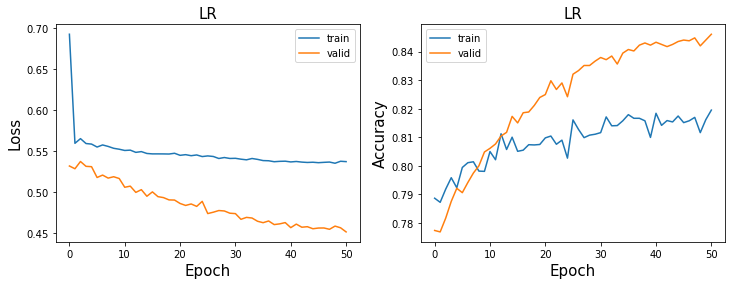

Train loss for epoch 0: 0.7635210752487183
Val loss for epoch 0: 0.546755313873291
Train loss for epoch 1: 0.6272178888320923
Val loss for epoch 1: 0.5611075162887573
Train loss for epoch 2: 0.6377131342887878
Val loss for epoch 2: 0.5846803784370422
Train loss for epoch 3: 0.6172106266021729
Val loss for epoch 3: 0.5685709118843079
Train loss for epoch 4: 0.6195069551467896
Val loss for epoch 4: 0.5695621967315674
Train loss for epoch 5: 0.6079820990562439
Val loss for epoch 5: 0.5587567090988159
Train loss for epoch 6: 0.6095666289329529
Val loss for epoch 6: 0.5562577247619629
Train loss for epoch 7: 0.6051809191703796
Val loss for epoch 7: 0.5479547381401062
Train loss for epoch 8: 0.6119720935821533
Val loss for epoch 8: 0.5459153652191162
8
Train loss for epoch 9: 0.6130650639533997
Val loss for epoch 9: 0.5498418211936951
Train loss for epoch 10: 0.6087068319320679
Val loss for epoch 10: 0.5472082495689392
Train loss for epoch 11: 0.6095053553581238
Val loss for epoch 11: 0.5410

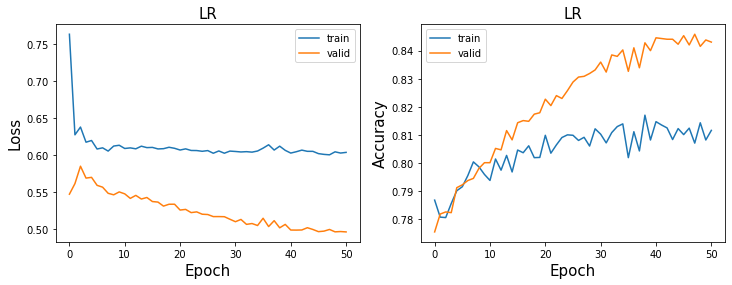

In [33]:
for alpha in alphas:
    model = GLM(input_dim=100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break           
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [34]:
model_LR = os.listdir(model_saving_path)
results = []
for alpha in alphas:
    epoch_results = []
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'REDUCEsum' in s:
            continue
        else:
            if '_CH23_' in s and reg_alpha in s:
                model_name = model_LR[i].split('_')
                epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
                res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
                if len(res) > 1:
                    epoch_result = res[0]*10+res[1]
                else:
                    epoch_result = res[0]
                epoch_results.append(epoch_result)
            
    results.append([alpha, max(epoch_results)])
    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1         41
50        50
100       50


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/LR_models/LR_CH23_LOSSbce_REGfinite_diff1_EPOCH41.pt


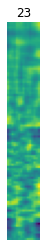

validation loss:0.4065660834312439 accuracy:0.8349020605443908
0.7914017
date:180327, rec:006, time:117.0, label:1.0
Original data 62 CH


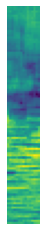

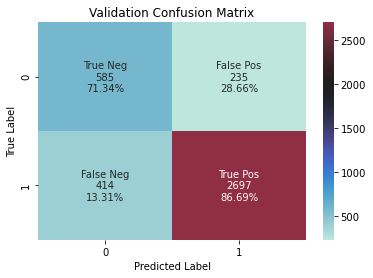

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/LR_models/LR_CH23_LOSSbce_REGfinite_diff50_EPOCH50.pt


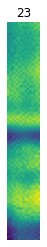

validation loss:0.4511035978794098 accuracy:0.846095141185449
0.7914017
date:180327, rec:006, time:117.0, label:1.0
Original data 62 CH


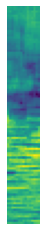

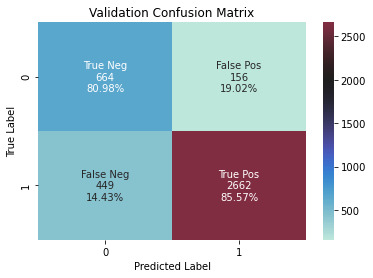

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/LR_models/LR_CH23_LOSSbce_REGfinite_diff100_EPOCH50.pt


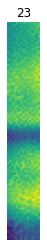

validation loss:0.49562206864356995 accuracy:0.8430424828287968
0.7914017
date:180327, rec:006, time:117.0, label:1.0
Original data 62 CH


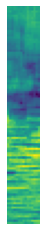

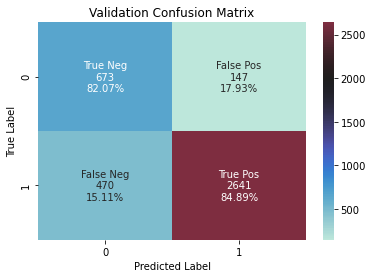

In [36]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*timewindow).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, timewindow)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device, timewindow = timewindow)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Confusion matrix
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()

### SVM without regularization

### SVM with L2 regularization

In [15]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5 # have special meaning as margin, corresponding to 1 in the hinge loss
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'l2'

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [26]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6851320862770081
Val loss for epoch 0: 0.7111771702766418
Train loss for epoch 1: 0.6442375183105469
Val loss for epoch 1: 0.7678999900817871
Train loss for epoch 2: 0.6391520500183105
Val loss for epoch 2: 0.7529788017272949
Train loss for epoch 3: 0.6417877078056335
Val loss for epoch 3: 0.6641672253608704
3
Train loss for epoch 4: 0.6390126347541809
Val loss for epoch 4: 0.6984342932701111
Train loss for epoch 5: 0.6404396295547485
Val loss for epoch 5: 0.7401537895202637
Train loss for epoch 6: 0.639179527759552
Val loss for epoch 6: 0.6993381977081299
Train loss for epoch 7: 0.6405513882637024
Val loss for epoch 7: 0.6649073362350464
Train loss for epoch 8: 0.6384839415550232
Val loss for epoch 8: 0.6716033816337585
Train loss for epoch 9: 0.6426579356193542
Val loss for epoch 9: 0.7246717214584351
Train loss for epoch 10: 0.6410369277000427
Val loss for epoch 10: 0.714557945728302
Train loss for epoch 11: 0.640546977519989
Val loss for epoch 11: 0.700012

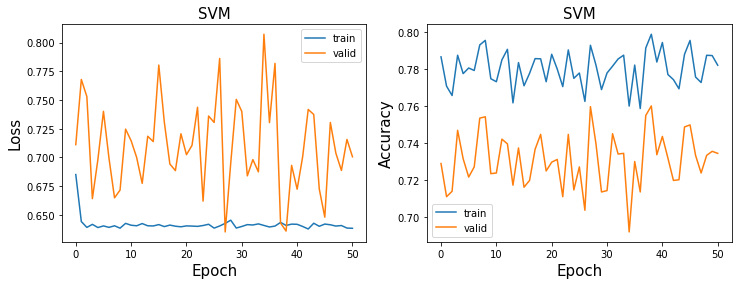

In [27]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [16]:
best_epoch = 27

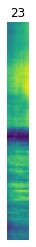

In [17]:
model = GLM(input_dim=100*10).to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [18]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_4 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.9384552836418152 accuracy:0.6475384615384615


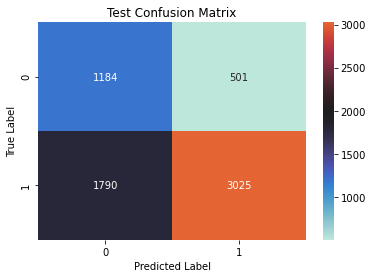

In [19]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:004, label:1.0
Original data 62 CH


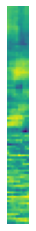

In [20]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_4[0][0], cases_wrong_4[0][1], cases_wrong_4[0][1], cases_wrong_4[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_4[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

### SVM with finite difference regularization

In [21]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'finite_diff'

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [29]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6690675616264343
Val loss for epoch 0: 0.7053626179695129
Train loss for epoch 1: 0.579605758190155
Val loss for epoch 1: 0.6587177515029907
1
Train loss for epoch 2: 0.5777973532676697
Val loss for epoch 2: 0.661455512046814
Train loss for epoch 3: 0.5772103071212769
Val loss for epoch 3: 0.6873345375061035
Train loss for epoch 4: 0.5797932744026184
Val loss for epoch 4: 0.6312553286552429
4
Train loss for epoch 5: 0.5747454762458801
Val loss for epoch 5: 0.6387228965759277
Train loss for epoch 6: 0.5753779411315918
Val loss for epoch 6: 0.6457529067993164
Train loss for epoch 7: 0.5756300687789917
Val loss for epoch 7: 0.570262610912323
7
Train loss for epoch 8: 0.5766920447349548
Val loss for epoch 8: 0.6651206016540527
Train loss for epoch 9: 0.5784576535224915
Val loss for epoch 9: 0.6457962989807129
Train loss for epoch 10: 0.5766485929489136
Val loss for epoch 10: 0.6799610257148743
Train loss for epoch 11: 0.577312171459198
Val loss for epoch 11: 0.635

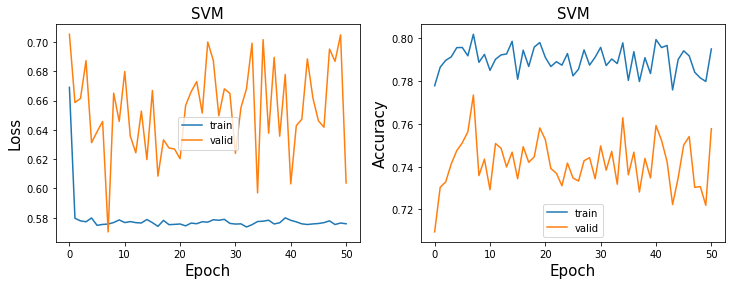

In [30]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [22]:
best_epoch = 7

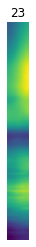

In [23]:
model = GLM(input_dim=100*10).to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [24]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_5 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.8175214529037476 accuracy:0.6916923076923077


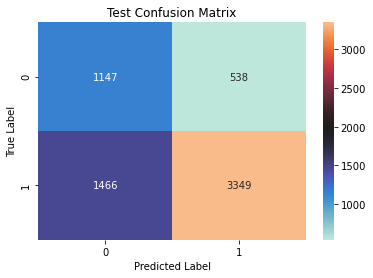

In [25]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:004, label:1.0
Original data 62 CH


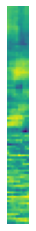

In [26]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_5[0][0], cases_wrong_5[0][1], cases_wrong_5[0][1], cases_wrong_5[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_5[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()